In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Binary Classification
means=np.array([1,0.5])
covariance=np.array([[1,0.1],[0.1,1.2]])
x1=np.random.multivariate_normal(means,covariance,500)

In [3]:
means2=np.array([4,5])
covariance2=np.array([[1.21,0.1],[0.1,1.3]])
x2=np.random.multivariate_normal(means2,covariance2,500)


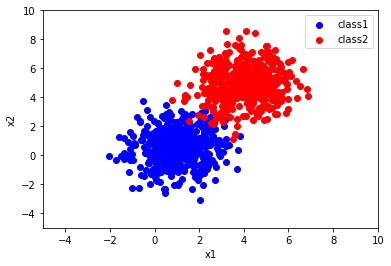

In [4]:
plt.scatter(x1[:,0],x1[:,1],color='blue',label='class1')
plt.scatter(x2[:,0],x2[:,1],color='red',label='class2')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [5]:
data=np.zeros((1000,3))
data[:500,:2]=x1
data[500:,:2]=x2
data[500:,-1]=1
np.random.shuffle(data)

In [6]:
#Divide the data into training and testing
value=(int)(0.8*data.shape[0])
x_train=data[:value,:2]
y_train=data[:value,-1]

x_test=data[value:,:2]
y_test=data[value:,-1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


In [14]:
# code for logistic regression
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [21]:
loss = []
acc = []

W = 2*np.random.random((x_train.shape[1],))
b = 5*np.random.random()

In [22]:
for i in range(1000):
    l,W,b = grad_descent(x_train,y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(x_test,y_test,W,b))
    loss.append(l)

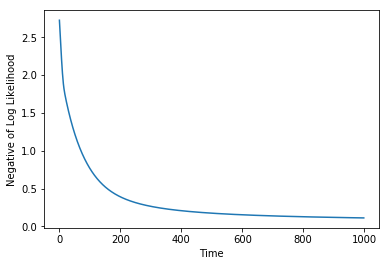

In [23]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

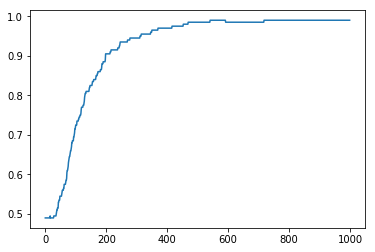

0.99


In [24]:
plt.plot(acc)
plt.show()
print(acc[-1])


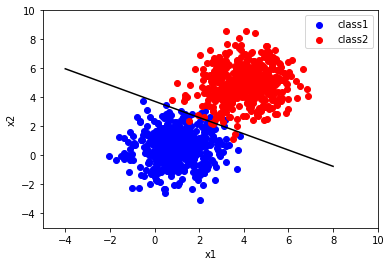

In [25]:
plt.scatter(x1[:,0],x1[:,1],color='blue',label='class1')
plt.scatter(x2[:,0],x2[:,1],color='red',label='class2')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [26]:
print(W)
print(b)

[0.69645988 1.24190584]
-4.628730951928352
